In [ ]:
dfrom google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

import sys
sys.path.append('/content/gdrive/My Drive')

import os
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [ ]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

In [ ]:
from imutils import paths

imgpths = paths.list_images('Dataset')
list_files('Dataset')

Dataset/
    amirhajj/
        amirhajj70.jpg
        amirhajj97.jpg
        amirhajj69.jpg
        amirhajj71.jpg
        amirhajj65.jpg
        amirhajj87.jpg
        amirhajj90.jpg
        amirhajj77.jpg
        amirhajj99.jpg
        amirhajj98.jpg
        amirhajj95.jpg
        amirhajj62.jpg
        amirhajj72.jpg
        amirhajj85.jpg
        amirhajj79.jpg
        amirhajj67.jpg
        amirhajj57.jpg
        amirhajj78.jpg
        amirhajj54.jpg
        amirhajj94.jpg
        amirhajj80.jpg
        amirhajj56.jpg
        amirhajj81.jpg
        amirhajj61.jpg
        amirhajj82.jpg
        amirhajj92.jpg
        amirhajj86.jpg
        amirhajj76.jpg
        amirhajj58.jpg
        amirhajj89.jpg
        amirhajj63.jpg
        amirhajj74.jpg
        amirhajj52.jpg
        amirhajj66.jpg
        amirhajj68.jpg
        amirhajj88.jpg
        amirhajj91.jpg
        amirhajj84.jpg
        amirhajj73.jpg
        amirhajj100.jpg
        amirhajj96.jpg
        amirhajj64.jpg
        am

In [ ]:
def unique(list1):
 
    unique_list = []
     
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [ ]:
import numpy as np
from PIL import Image


kumpl_gmbr = []
kumpl_lbl = []
imgpths = paths.list_images('Dataset')

for dirimg in imgpths:
  gmbr = Image.open(dirimg)
  gmbrz = np.array(gmbr.resize((224,224))) / 255.0
  kumpl_gmbr.append(gmbrz)

  lbl_kls = dirimg.split(os.path.sep) [-2]
  kumpl_lbl.append(lbl_kls)
kelas_asli = unique(kumpl_lbl)
kelas_asli

['amirhajj', 'turkis', 'saudia']

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
kumpl_lbl = lb.fit_transform(kumpl_lbl)
if len(kelas_asli)==2:
  kumpl_lbl = np.hstack((kumpl_lbl, 1 - kumpl_lbl)) 

In [ ]:
lb.classes_

array(['amirhajj', 'saudia', 'turkis'], dtype='<U8')

Program berikut berfungsi sama seperti code pada modul sebelumnya.

In [ ]:
from sklearn.model_selection import train_test_split

ratio_latih = 0.8
ratio_uji = 0.1
ratio_val = 0.1

(latihX, ujiX, latihY, ujiY) = train_test_split(np.array(kumpl_gmbr),np.array(kumpl_lbl), test_size=1-ratio_latih)
(ujiX, valX, ujiY, valY) = train_test_split(ujiX, ujiY, test_size=ratio_val/(ratio_uji+ratio_val))

print(latihX.shape)
print(latihY.shape)
print(ujiX.shape)
print(ujiY.shape)
print(valX.shape)
print(valY.shape)

(120, 224, 224, 3)
(120, 3)
(15, 224, 224, 3)
(15, 3)
(15, 224, 224, 3)
(15, 3)


Proses pembagian data menjadi 3 kelompok dari dataset yang tersedia, dimulai dengan membagi data untuk data latih dan data yang nantinya akan dibagi lagi menjadi data untuk data validasi dan data uji.

Data Latih
amirhajj


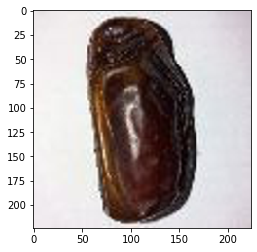

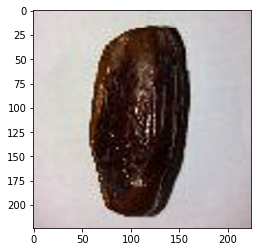

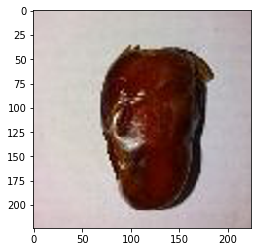

turkis


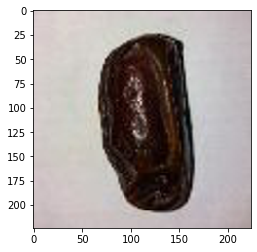

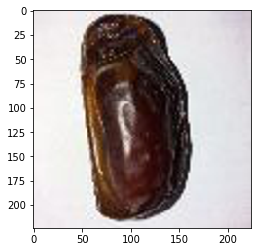

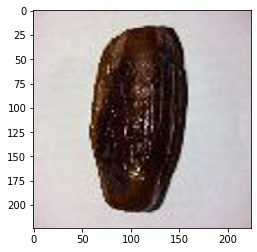

saudia


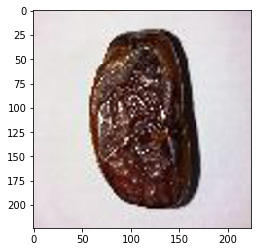

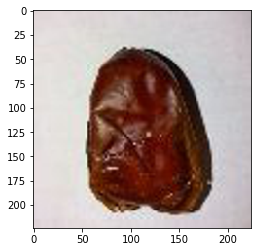

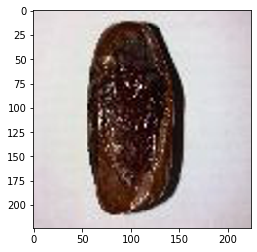

Data Uji
amirhajj


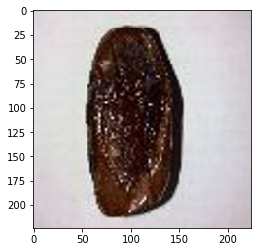

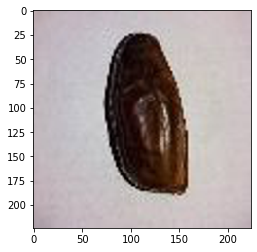

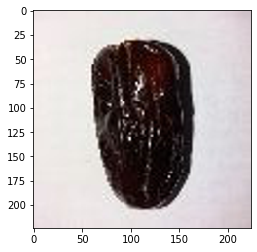

turkis


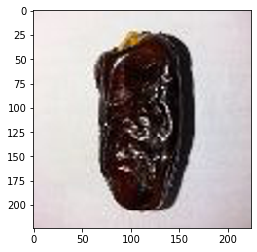

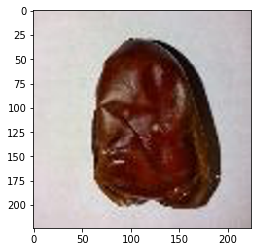

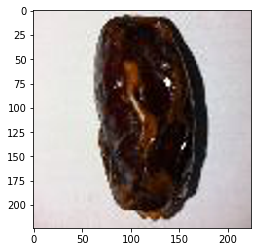

saudia


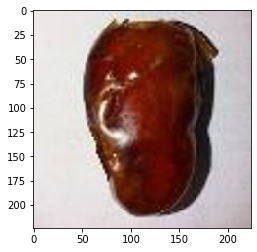

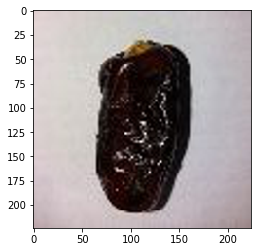

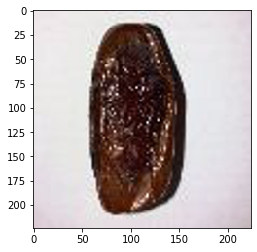

Data Validasi
amirhajj


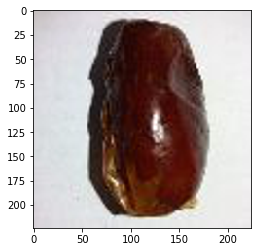

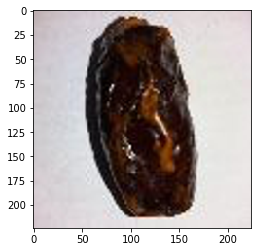

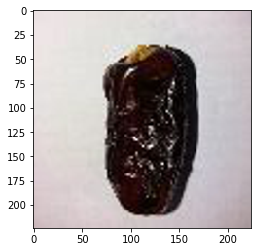

turkis


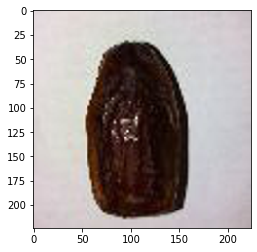

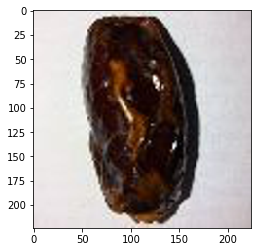

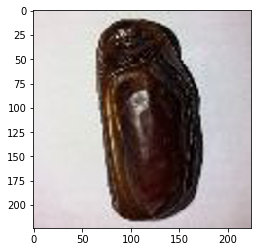

saudia


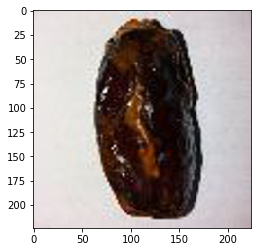

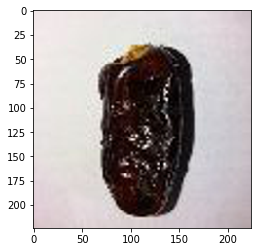

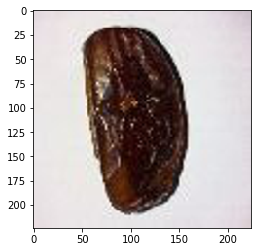

In [ ]:
from matplotlib import pyplot as plt

banyak_lth=latihX.shape
banyak_uji=ujiX.shape
banyak_val=valX.shape
total = banyak_lth[0]+banyak_uji[0]+banyak_val[0]
num_kelas = kumpl_lbl.shape
jum_kls=num_kelas[1]
la_tmpl = banyak_lth[0]/num_kelas[1]
uji_tmpl = banyak_uji[0]/num_kelas[1]
val_tmpl = banyak_val[0]/num_kelas[1]

print('Data Latih')
i=0
print(kelas_asli[0])
kk=1

x=0
while x < banyak_lth[0]:
  if i==3:
    if x<la_tmpl*(jum_kls-1):
      print(kelas_asli[kk])
    if i==3:
      x=x+la_tmpl-i
      if  x >= banyak_lth[0]:
        break
      kk=kk+1
      i=0
  plt.imshow(latihX[int(x)], interpolation='nearest')
  plt.show()
  i=i+1
  x=x+1

print('Data Uji')
i=0
print(kelas_asli[0])
kk=1

x=0
while x < banyak_uji[0]:
  if i==3:
    if x<uji_tmpl*(jum_kls-1):
      print(kelas_asli[kk])
    if i==3:
      x=x+uji_tmpl-i
      if  x >= banyak_uji[0]:
        break
      kk=kk+1
      i=0
  plt.imshow(ujiX[int(x)], interpolation='nearest')
  plt.show()
  i=i+1
  x=x+1

print('Data Validasi')
i=0
print(kelas_asli[0])
kk=1

x=0
while x < banyak_val[0]:
  if i==3:
    if x<val_tmpl*(jum_kls-1):
      print(kelas_asli[kk])
  if i==3:
    x=x+val_tmpl-i
    if  x >= banyak_val[0]:
      break
    kk=kk+1
    i=0

  plt.imshow(valX[int(x)], interpolation='nearest')
  plt.show()

  i=i+1
  x=x+1 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

Functionnya ini digunakan untuk melakukan augmentasi terhadap dataset yang ada. Parameter-parameter berikut diset sesuai yang diinginkan.

In [ ]:
i=0
banyak_lth=latihX.shape
aug=[]
labels2=[]
for jj in range(banyak_lth[0]):
  x = latihX[jj]
  x = x.reshape((1,) + x.shape)  

  for aug in datagen.flow(x, batch_size=1):
      print(latihX.shape)
      latihX = np.append(latihX, aug,axis=0)
      label = latihY[jj]
      label = label.reshape((1,) + label.shape)   
      latihY = np.append(latihY, label,axis=0)
      if i == 1:
        break 
      i += 1

(120, 224, 224, 3)
(121, 224, 224, 3)
(122, 224, 224, 3)
(123, 224, 224, 3)
(124, 224, 224, 3)
(125, 224, 224, 3)
(126, 224, 224, 3)
(127, 224, 224, 3)
(128, 224, 224, 3)
(129, 224, 224, 3)
(130, 224, 224, 3)
(131, 224, 224, 3)
(132, 224, 224, 3)
(133, 224, 224, 3)
(134, 224, 224, 3)
(135, 224, 224, 3)
(136, 224, 224, 3)
(137, 224, 224, 3)
(138, 224, 224, 3)
(139, 224, 224, 3)
(140, 224, 224, 3)
(141, 224, 224, 3)
(142, 224, 224, 3)
(143, 224, 224, 3)
(144, 224, 224, 3)
(145, 224, 224, 3)
(146, 224, 224, 3)
(147, 224, 224, 3)
(148, 224, 224, 3)
(149, 224, 224, 3)
(150, 224, 224, 3)
(151, 224, 224, 3)
(152, 224, 224, 3)
(153, 224, 224, 3)
(154, 224, 224, 3)
(155, 224, 224, 3)
(156, 224, 224, 3)
(157, 224, 224, 3)
(158, 224, 224, 3)
(159, 224, 224, 3)
(160, 224, 224, 3)
(161, 224, 224, 3)
(162, 224, 224, 3)
(163, 224, 224, 3)
(164, 224, 224, 3)
(165, 224, 224, 3)
(166, 224, 224, 3)
(167, 224, 224, 3)
(168, 224, 224, 3)
(169, 224, 224, 3)
(170, 224, 224, 3)
(171, 224, 224, 3)
(172, 224, 2

Source code ini berfungsi untuk melakukan augmentasi terhadap data latih yang telah terpilah. Pada source code ini melakukan augmentasi untuk masing-masing gambar sebanyak 1 kali sesuai dengan banyaknya nilai i, sehingga gambar akan menjadi 2 kali lipat dari sebelumnya.

In [ ]:
print(latihX.shape)
print(latihY.shape)

(241, 224, 224, 3)
(241, 3)


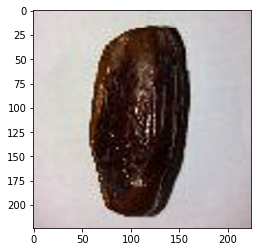

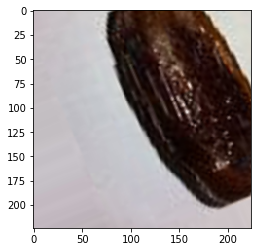

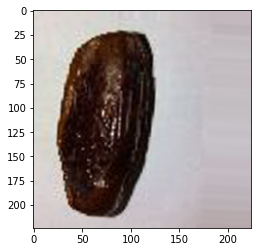

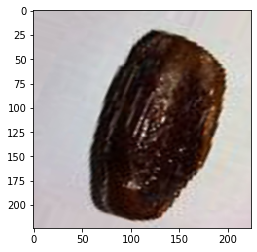

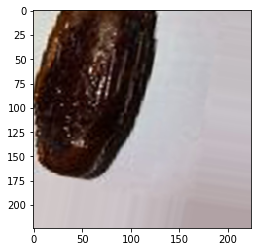

In [ ]:

x = latihX[1]
plt.imshow(x, interpolation='nearest')
plt.show()
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
i = 0


for batch in datagen.flow(x, batch_size=1):
  mas = batch[0,:,:,:] #( 150, 150, 3)
  plt.imshow(mas, interpolation='nearest')
  plt.show()
  if i == 3:
    break 
  i += 1


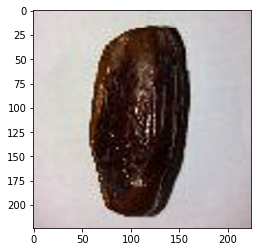

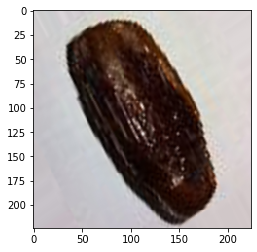

In [ ]:

x = latihX[1]
plt.imshow(x, interpolation='nearest')
plt.show()
datagen = ImageDataGenerator()
augmenfix = datagen.apply_transform(x=x, transform_parameters={'theta':30, 'tx':0.2,'ty':0.2,'shear':0.2,'zx':0.85,'flip_horizontal':True})
plt.imshow(augmenfix, interpolation='nearest')
plt.show()

code berikut berfungsi untuk menampilkan contoh gambar yang merupakan hasil dari augmentasi.

**VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models


vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
vgg.trainable = False 
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

vgg_new = models.Sequential([
    vgg,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

vgg_new.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Hsl_train = vgg_new.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 10, batch_size = 25)

58900480/58889256 [==============================] - 1s 0us/step
Epoch 1/10
10/10 [==============================] - 19s 642ms/step - loss: 1.4063 - accuracy: 0.3859 - val_loss: 1.1360 - val_accuracy: 0.2000
Epoch 2/10
10/10 [==============================] - 3s 262ms/step - loss: 0.8613 - accuracy: 0.6017 - val_loss: 0.8246 - val_accuracy: 0.4000
Epoch 3/10
10/10 [==============================] - 3s 261ms/step - loss: 0.6457 - accuracy: 0.7344 - val_loss: 0.6903 - val_accuracy: 0.5333
Epoch 4/10
10/10 [==============================] - 3s 261ms/step - loss: 0.4988 - accuracy: 0.8008 - val_loss: 0.4939 - val_accuracy: 0.8000
Epoch 5/10
 4/10 [===========>..................] - ETA: 1s - loss: 0.3433 - accuracy: 0.9500

Proses pengambilan pre trained model vgg16 dan pembuatan ulang model VGG16 yang telah disesuaikan. Bagian paling penting adalah menyesuaikan jumlah kelas dari model yang ingin dirancang.

Text(0, 0.5, 'acc')

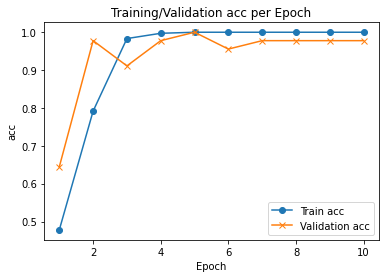

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + Hsl_train.history['accuracy'], 'o-')
ax.plot([None] + Hsl_train.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Menampilkan grafik hasil nilai akurasi dari proses train dan validasi dengan sumbu X sebagai Epoch dan sumbu Y sebagai Acc (Akurasi). Grafik yang baik adalah ketika Validation Acc memiliki gap yang kecil atau dapat sejajar dengan Train Acc. Nilai Train berasala dari data latih sedangkan data validation berdasarkan data validasi.

Text(0, 0.5, 'Loss')

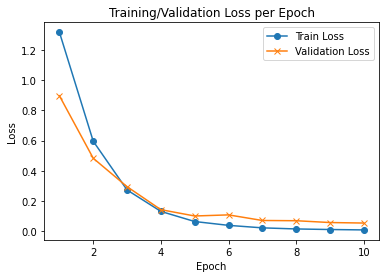

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + Hsl_train.history['loss'], 'o-')
ax.plot([None] + Hsl_train.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [ ]:
from keras.models import load_model

vgg_new.save('VGG6.h5')

Program berikut menampilkan training loss dan validation loss. Memiliki konsep yang sama dimana gap antara Train loss dan Validation loss sebaiknya kecil.

In [ ]:
from sklearn.metrics import confusion_matrix
predict = vgg_new.predict(valX)
rounded_pred=np.argmax(predict, axis=1)
rounded_ujiY=np.argmax(valY, axis=1)
 le.inverse_transform(predictions_train)
print(confusion_matrix(rounded_ujiY, rounded_pred))


[[ 9  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  1  6  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0 11]]


In [ ]:
rounded_pred

array([2, 5, 0, 5, 3, 4, 5, 5, 3, 0, 4, 0, 3, 4, 2, 3, 2, 5, 2, 0, 5, 5,
       0, 3, 1, 4, 4, 5, 1, 4, 4, 0, 5, 4, 2, 5, 5, 2, 3, 0, 0, 4, 1, 0,
       4])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names=kelas_asli,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    if normalize:
      plt.imshow(cm/7, interpolation='nearest', cmap=cmap)
    else:
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.3f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

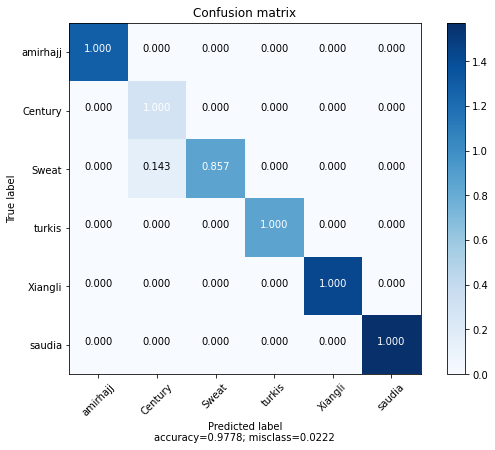

In [ ]:
cm = confusion_matrix(rounded_ujiY,  rounded_pred)
plot_confusion_matrix(cm)

VGG 19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import layers, models


vgg = VGG19(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
vgg.trainable = False 
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

vgg_new = models.Sequential([
    vgg,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

vgg_new.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Hsl_train = vgg_new.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 10, batch_size = 25)

80150528/80134624 [==============================] - 2s 0us/step
Epoch 1/10
10/10 [==============================] - 4s 331ms/step - loss: 1.2332 - accuracy: 0.4315 - val_loss: 1.1184 - val_accuracy: 0.6000
Epoch 2/10
10/10 [==============================] - 3s 285ms/step - loss: 0.8754 - accuracy: 0.5685 - val_loss: 0.5029 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 3s 287ms/step - loss: 0.4831 - accuracy: 0.8838 - val_loss: 0.3511 - val_accuracy: 0.9333
Epoch 4/10
10/10 [==============================] - 3s 285ms/step - loss: 0.3337 - accuracy: 0.9378 - val_loss: 0.3225 - val_accuracy: 0.9333
Epoch 5/10
10/10 [==============================] - 3s 285ms/step - loss: 0.2522 - accuracy: 0.9585 - val_loss: 0.2359 - val_accuracy: 0.9333
Epoch 6/10
10/10 [==============================] - 3s 287ms/step - loss: 0.1836 - accuracy: 0.9710 - val_loss: 0.1782 - val_accuracy: 0.9333
Epoch 7/10
10/10 [==============================] - 3s 287ms/step - loss: 0.1344 - 

Proses pengambilan pre trained model VGG-19 dan pembentukkan ulang model, menentukkan hyperparameter dan menjalankan proses latih model.

In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Untuk menunjukkan setiap layer dari model yang telah terbentuk.

Text(0, 0.5, 'acc')

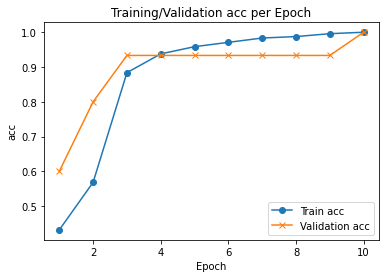

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + Hsl_train.history['accuracy'], 'o-')
ax.plot([None] + Hsl_train.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

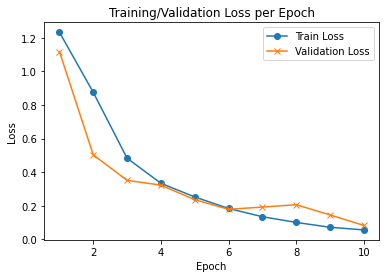

In [ ]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + Hsl_train.history['loss'], 'o-')
ax.plot([None] + Hsl_train.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [ ]:
from sklearn.metrics import confusion_matrix
predict = vgg_new.predict(valX)
rounded_pred=np.argmax(predict, axis=1)
rounded_valY=np.argmax(valY, axis=1)
print(confusion_matrix(rounded_valY, rounded_pred))

[[6 0 0]
 [0 4 0]
 [0 0 5]]


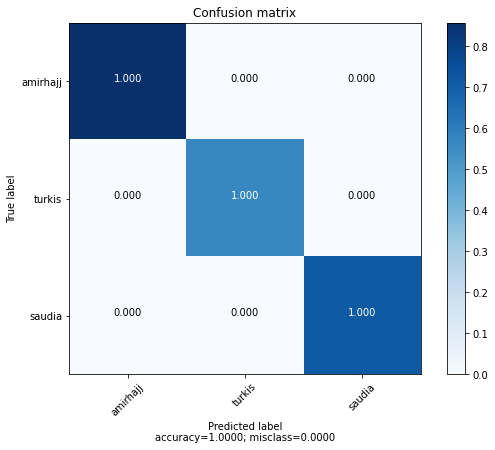

In [ ]:
cm = confusion_matrix(rounded_ujiY,  rounded_pred)
plot_confusion_matrix(cm)

ResNet 50

In [ ]:
import tensorflow.keras 

In [ ]:
import tensorflow.keras 

input_img = tensorflow.keras.Input(shape=(224,224,3))
Res_mod = tensorflow.keras.applications.ResNet50(include_top = False, weights = "imagenet", input_tensor=input_img)

94781440/94765736 [==============================] - 1s 0us/step


Proses pengambilan pre-trained model dari ResNet.

In [ ]:
Res_mod.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
for layer in Res_mod.layers[:143]:
  layer.trainable = False

Source code ini berfungsi untuk me-frezee weight sehingga nilai weight akan tetap sama.

In [ ]:
from tensorflow.keras import layers, models
to_res = (224,224)

lambda_layer = layers.Lambda(lambda image: tensorflow.image.resize(image,to_res))
flatten_layer = layers.Flatten()
batch_layer = layers.BatchNormalization()
dropout_layer = layers.Dropout(0.5)
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
dense_layer_3 = layers.Dense(64, activation='relu')
prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

Resnew = models.Sequential([
    lambda_layer,
    Res_mod,
    flatten_layer,
    batch_layer,
    dense_layer_1,
    dropout_layer,
    batch_layer,
    dense_layer_2,
    dropout_layer,
    batch_layer,
    dense_layer_3,
    dropout_layer,
    batch_layer,
    prediction_layer
])

Resnew.compile(
    optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Hsl_train = Resnew.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 25, batch_size = 32)

Epoch 1/25
8/8 [==============================] - 15s 770ms/step - loss: 1.4515 - accuracy: 0.4149 - val_loss: 2.4456 - val_accuracy: 0.4000
Epoch 2/25
8/8 [==============================] - 3s 323ms/step - loss: 0.8758 - accuracy: 0.6266 - val_loss: 2.4940 - val_accuracy: 0.4000
Epoch 3/25
8/8 [==============================] - 3s 324ms/step - loss: 0.6317 - accuracy: 0.7220 - val_loss: 2.3262 - val_accuracy: 0.4000
Epoch 4/25
8/8 [==============================] - 3s 323ms/step - loss: 0.4844 - accuracy: 0.8133 - val_loss: 2.1294 - val_accuracy: 0.4000
Epoch 5/25
8/8 [==============================] - 3s 322ms/step - loss: 0.4102 - accuracy: 0.8465 - val_loss: 2.0163 - val_accuracy: 0.4000
Epoch 6/25
8/8 [==============================] - 3s 323ms/step - loss: 0.3433 - accuracy: 0.8755 - val_loss: 1.8803 - val_accuracy: 0.4000
Epoch 7/25
8/8 [==============================] - 3s 323ms/step - loss: 0.2596 - accuracy: 0.9212 - val_loss: 1.7549 - val_accuracy: 0.4000
Epoch 8/25
8/8 [===

In [ ]:
Pembentukkan model ulang berdasarkan pre trained model sebelumnya.

In [ ]:
from sklearn.metrics import classification_report

print("[INFO] evaluating network...")
predictions = Resnew.predict(ujiX, batch_size=32)
print(classification_report(ujiY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    amirhajj       1.00      0.33      0.50         6
      saudia       0.38      1.00      0.56         5
      turkis       0.00      0.00      0.00         4

    accuracy                           0.47        15
   macro avg       0.46      0.44      0.35        15
weighted avg       0.53      0.47      0.39        15



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Source code berikut berfungsi untuk mengevaluasi model yang telah dilatih, sehingga mendapatkan nilai precision recall dan f1-score dari masing-masing kelas.

In [ ]:
from sklearn.metrics import confusion_matrix
predict = Resnew.predict(valX)
rounded_pred=np.argmax(predict, axis=1)
rounded_valY=np.argmax(valY, axis=1)
print(confusion_matrix(rounded_valY, rounded_pred))

[[0 6 0]
 [0 4 0]
 [0 5 0]]


Source code untuk menampilkan confusion matrix apabila label dari data uji menggunakan bentuk biner.

Inception V3

In [ ]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
model = InceptionV3()
# summarize the model
model.summary()

96124928/96112376 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 rmalization)         

mengakuisisi pre-trained model inception V3 dan menampilkan layer dari model tersebut.

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers, models


incv3 = InceptionV3(input_shape=[224,224] + [3], weights='imagenet', include_top=False)
incv3.trainable = False 
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(len(kelas_asli), activation='softmax')

incv3_new = models.Sequential([
    incv3,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

incv3_new.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

Hsl_train = incv3_new.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 10, batch_size = 25)

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/10
10/10 [==============================] - 12s 613ms/step - loss: 6.4339 - accuracy: 0.5436 - val_loss: 2.6468 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 2s 159ms/step - loss: 1.4795 - accuracy: 0.8423 - val_loss: 0.5434 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 2s 158ms/step - loss: 0.3814 - accuracy: 0.9378 - val_loss: 0.7635 - val_accuracy: 0.9333
Epoch 4/10
10/10 [==============================] - 2s 157ms/step - loss: 0.0572 - accuracy: 0.9751 - val_loss: 0.4422 - val_accuracy: 0.8667
Epoch 5/10
10/10 [==============================] - 2s 159ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 0.9333
Epoch 6/10
10/10 [==============================] - 2s 157ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.2273 - val_accuracy: 0.9333
Epoch 7/10
10/10 [==============================] - 2s 156ms/step - loss: 2.4238e-

Proses pembentukkan model kembali dari pre-trained model yang sudah ada, kemudian melakukan proses latih terhadap model tersebut.

In [ ]:
from sklearn.metrics import confusion_matrix
predict = incv3_new.predict(valX)
rounded_pred=np.argmax(predict, axis=1)
rounded_valY=np.argmax(valY, axis=1)
print(confusion_matrix(rounded_valY, rounded_pred))

[[6 0 0]
 [0 4 0]
 [0 0 5]]


EfficientB0

In [ ]:
effB0 = tensorflow.keras.applications.efficientnet.EfficientNetB0(weights="imagenet", include_top=False, input_shape=((224,224,3)))
effB0.trainable = False

16719872/16705208 [==============================] - 0s 0us/step


Source code berfungsi untuk mengakuisisi pre-trained model EfficientB0 dan membuat weight agar tidak berubah.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

dropout_rate = 0.2
effB0_new = models.Sequential()
effB0_new.add(effB0)
effB0_new.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    effB0_new.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
effB0_new.add(layers.Dense(len(kelas_asli), activation="softmax", name="fc_out"))

Membentuk model baru untuk efficient0 dengan menggunakan pre-trained model dari code sebelumnya.

In [ ]:
import tensorflow

effB0_new.compile(
    loss="categorical_crossentropy",
    optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"],
)

Hsl_train = effB0_new.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 25, batch_size = 32)

Epoch 1/25
8/8 [==============================] - 11s 497ms/step - loss: 3.3506 - acc: 0.3029 - val_loss: 1.7597 - val_acc: 0.4000
Epoch 2/25
8/8 [==============================] - 1s 133ms/step - loss: 2.9415 - acc: 0.3776 - val_loss: 1.4453 - val_acc: 0.2667
Epoch 3/25
8/8 [==============================] - 1s 134ms/step - loss: 2.8528 - acc: 0.3568 - val_loss: 1.2540 - val_acc: 0.2667
Epoch 4/25
8/8 [==============================] - 1s 132ms/step - loss: 2.8539 - acc: 0.2946 - val_loss: 1.2281 - val_acc: 0.2667
Epoch 5/25
8/8 [==============================] - 1s 133ms/step - loss: 2.9494 - acc: 0.3237 - val_loss: 1.1469 - val_acc: 0.4000
Epoch 6/25
8/8 [==============================] - 1s 133ms/step - loss: 2.9157 - acc: 0.3485 - val_loss: 1.1888 - val_acc: 0.2667
Epoch 7/25
8/8 [==============================] - 1s 131ms/step - loss: 3.0466 - acc: 0.3402 - val_loss: 1.2183 - val_acc: 0.2667
Epoch 8/25
8/8 [==============================] - 1s 131ms/step - loss: 3.0282 - acc: 0.3

Menentukan hyperparameter untuk proses training kemudian melakukan proses training.

EfficientB7

In [ ]:
import tensorflow
effB7 = tensorflow.keras.applications.efficientnet.EfficientNetB7(weights="imagenet", include_top=False, input_shape=((224,224,3)))
effB7.trainable = False

258088960/258076736 [==============================] - 9s 0us/step


Source code berfungsi untuk mengakuisisi pre-trained model EfficientB7 dan membuat weight agar tidak berubah.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

dropout_rate = 0.2
effB7_new = models.Sequential()
effB7_new.add(effB7)
effB7_new.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    effB7_new.add(layers.Dropout(dropout_rate, name="dropout_out"))
# model.add(layers.Dense(256, activation='relu', name="fc1"))
effB7_new.add(layers.Dense(len(kelas_asli), activation="softmax", name="fc_out"))

Membentuk model baru untuk efficient0 dengan menggunakan pre-trained model dari code sebelumnya.

In [ ]:
import tensorflow

effB7_new.compile(
    loss="categorical_crossentropy",
    optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"],
)

Hsl_train = effB7_new.fit(latihX, latihY,validation_data=(ujiX, ujiY), epochs = 25, batch_size = 32)

Epoch 1/25
8/8 [==============================] - 10s 436ms/step - loss: 5.2670 - acc: 0.3361 - val_loss: 4.4030 - val_acc: 0.2667
Epoch 2/25
8/8 [==============================] - 1s 140ms/step - loss: 4.7686 - acc: 0.3527 - val_loss: 3.5957 - val_acc: 0.2667
Epoch 3/25
8/8 [==============================] - 1s 134ms/step - loss: 4.1363 - acc: 0.3651 - val_loss: 3.0243 - val_acc: 0.2667
Epoch 4/25
8/8 [==============================] - 1s 134ms/step - loss: 3.8850 - acc: 0.3485 - val_loss: 2.5137 - val_acc: 0.2667
Epoch 5/25
8/8 [==============================] - 1s 134ms/step - loss: 3.7521 - acc: 0.3154 - val_loss: 2.1129 - val_acc: 0.2667
Epoch 6/25
8/8 [==============================] - 1s 133ms/step - loss: 3.2121 - acc: 0.3071 - val_loss: 1.8549 - val_acc: 0.2667
Epoch 7/25
8/8 [==============================] - 1s 134ms/step - loss: 3.2833 - acc: 0.3278 - val_loss: 1.5265 - val_acc: 0.2667
Epoch 8/25
8/8 [==============================] - 1s 134ms/step - loss: 2.9770 - acc: 0.3

Menentukan hyperparameter untuk proses training kemudian melakukan proses training.

In [ ]:
from sklearn.metrics import confusion_matrix
predict = effB0_new.predict(valX)
rounded_pred=np.argmax(predict, axis=1)
rounded_valY=np.argmax(valY, axis=1)
print(confusion_matrix(rounded_valY, rounded_pred))

[[0 0 6]
 [0 0 4]
 [0 0 5]]
